In [1]:
from pathlib import Path
import pandas as pd
from docling.document_converter import DocumentConverter
from docling.datamodel.base_models import InputFormat
from docling_core.types.doc import ImageRefMode
from docling.document_converter import (
    DocumentConverter,
    PdfFormatOption,
    WordFormatOption,
)
from docling.pipeline.simple_pipeline import SimplePipeline
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend
from docling.datamodel.document import ConversionResult



/opt/anaconda3/envs/damg7245/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.images_scale = 2.0
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True

In [3]:
doc_converter = (
    DocumentConverter(  # all of the below is optional, has internal defaults.
        allowed_formats=[
            InputFormat.PDF,
        ],  # whitelist formats, non-matching files are ignored.
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_options=pipeline_options, # pipeline options go here.
                backend=PyPdfiumDocumentBackend # optional: pick an alternative backend
            ),
            InputFormat.DOCX: WordFormatOption(
                pipeline_cls=SimplePipeline # default for office formats and HTML
            ),
        },
    )
)

In [4]:
conv_result = doc_converter.convert("input_pdfs/assDMDD.pdf")

In [7]:
final_md_content = conv_result.document.export_to_markdown(image_mode=ImageRefMode.EMBEDDED)



















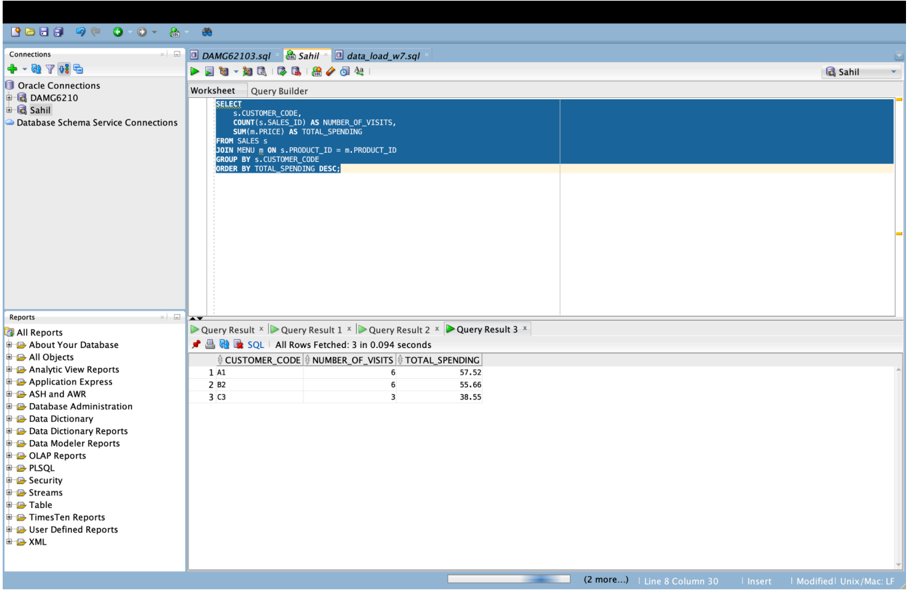
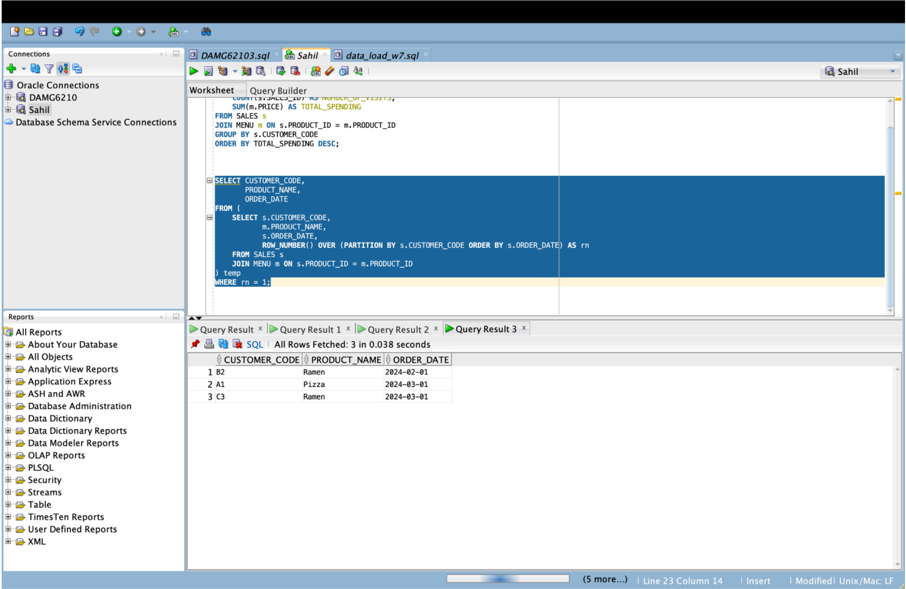
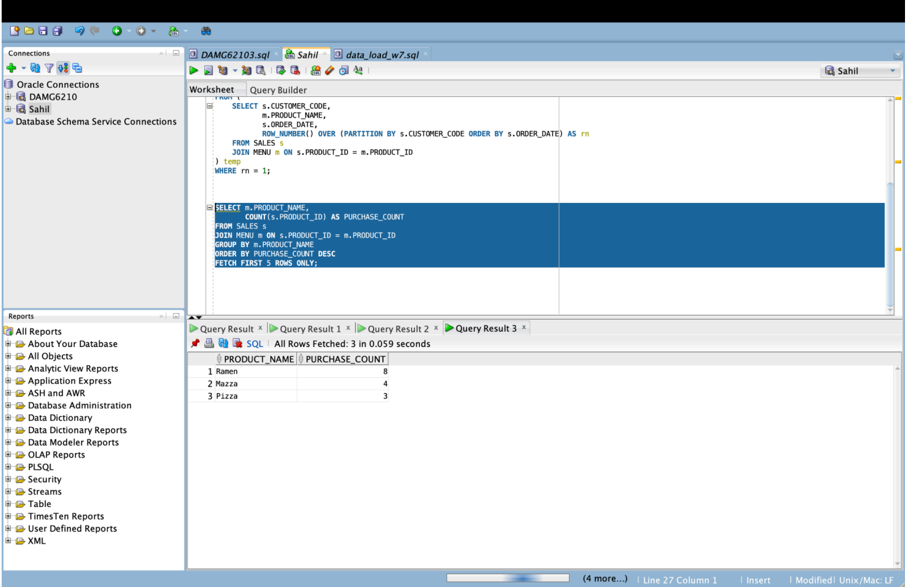
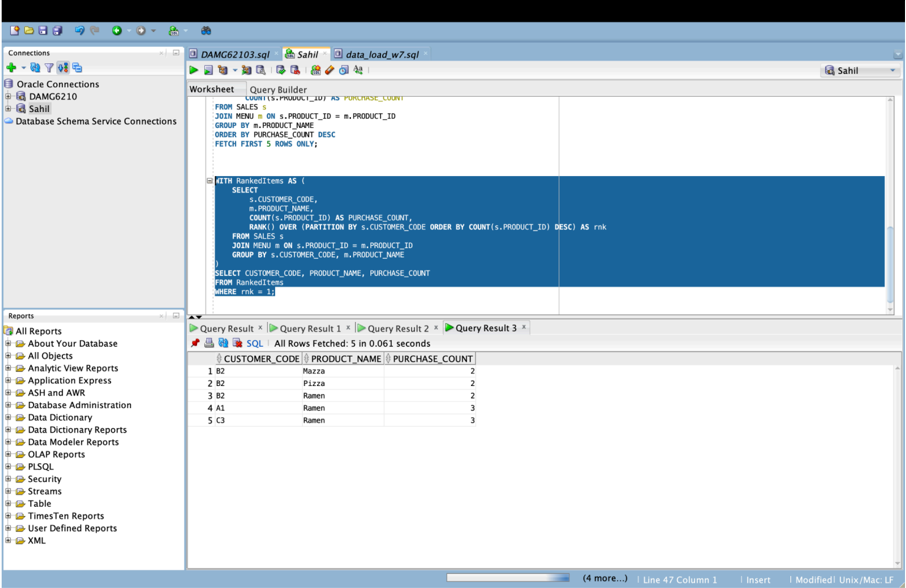
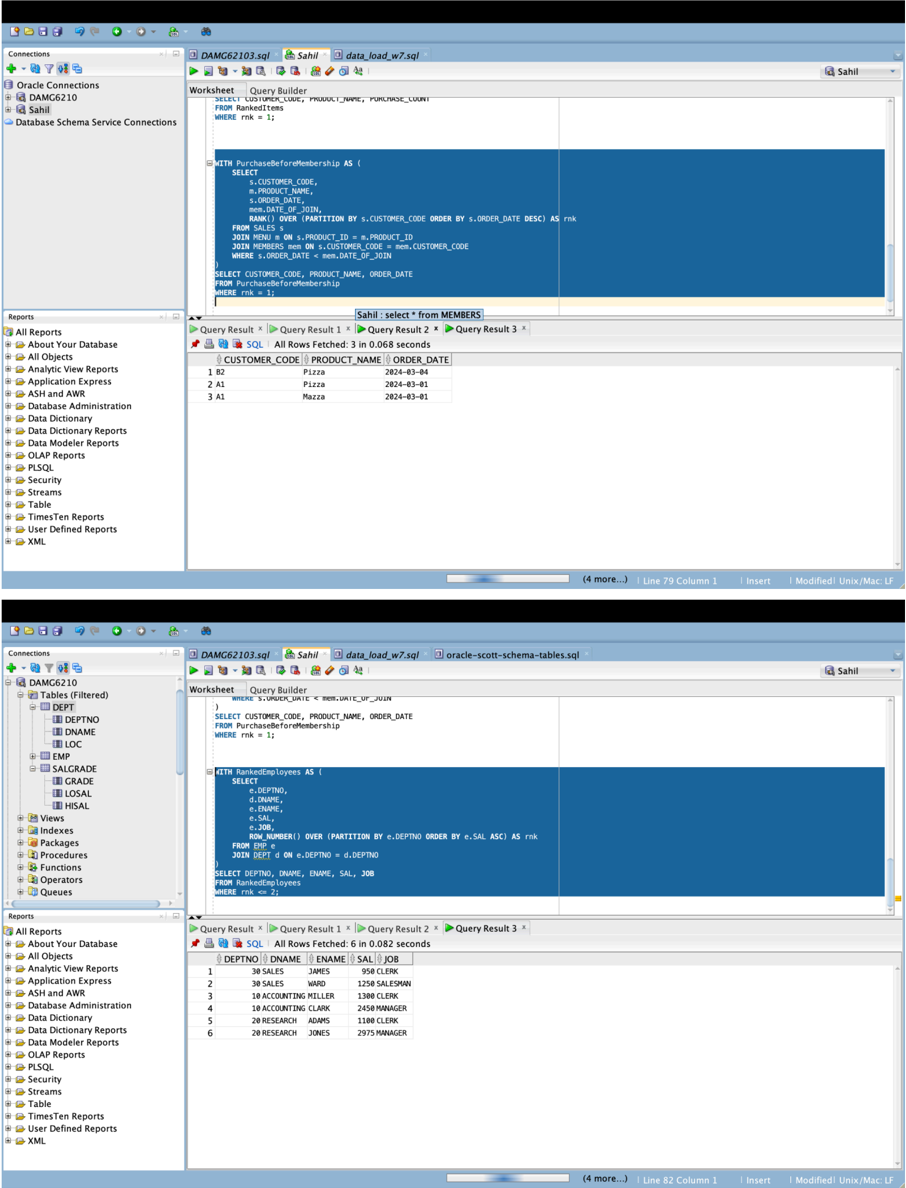
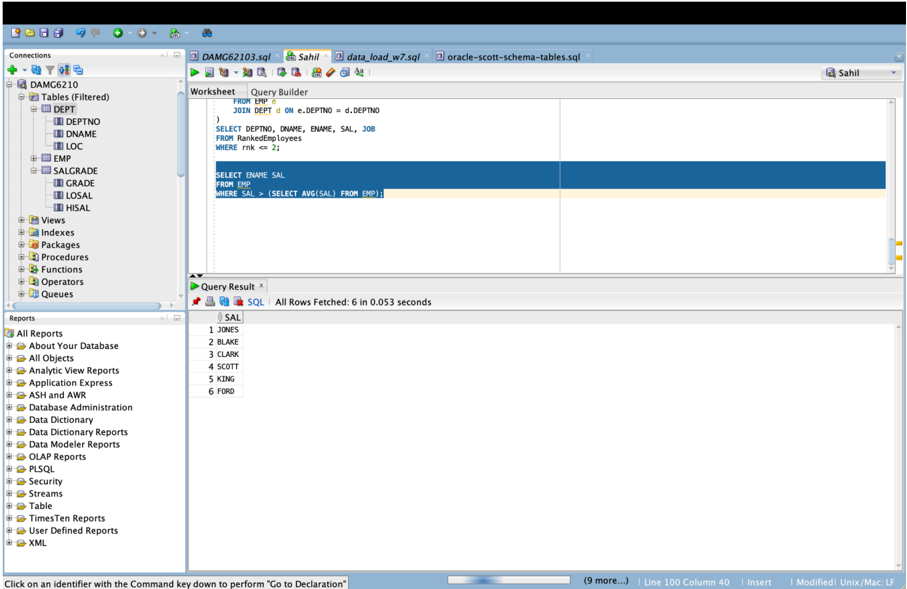
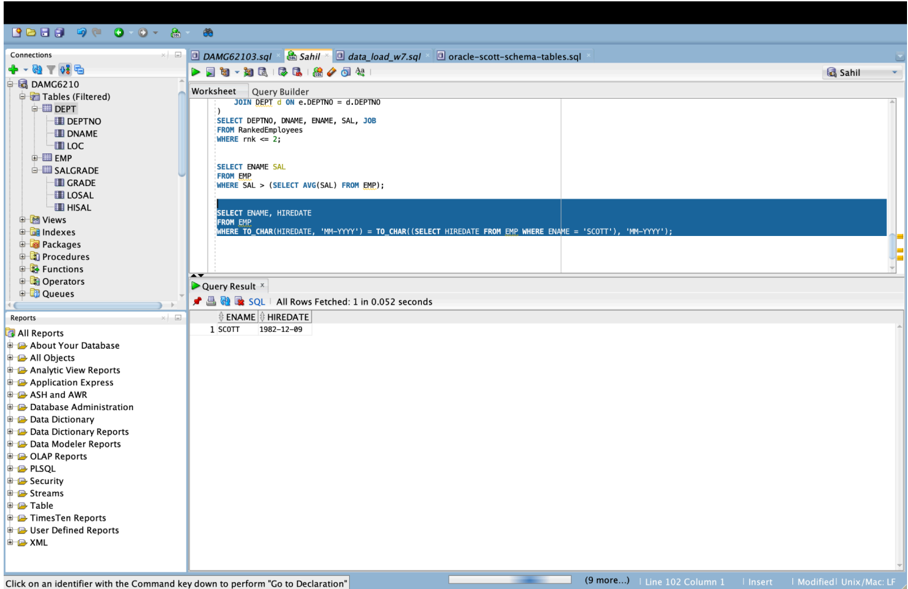
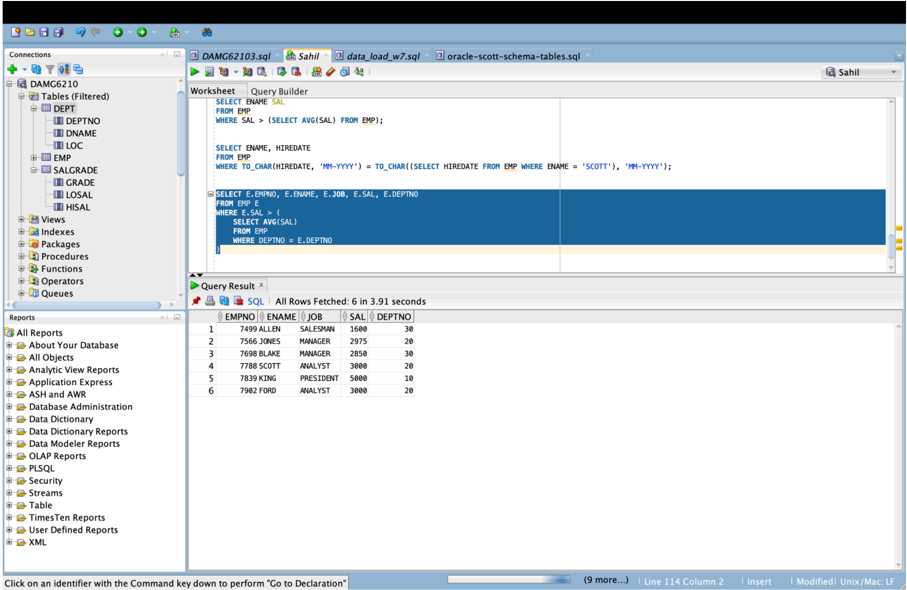
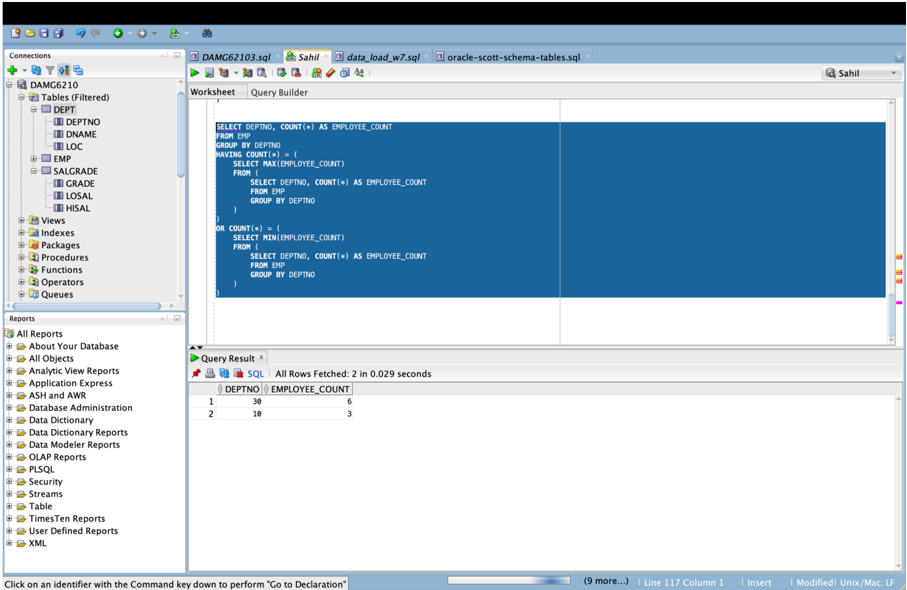

In [8]:
print(final_md_content)

In [9]:
import litellm
from dotenv import load_dotenv

load_dotenv()

response = litellm.completion(
    model="gemini/gemini-1.5-pro",
    messages=[
        {"role": "system", "content": "Summarize the provided input Markdown file in detail"},
        {"role": "user", "content": final_md_content},
#        {"role": "user", "content": "What optimizer was used when training the model?"},
    ]
)

In [10]:
print(response)

ModelResponse(id='chatcmpl-41356b6d-06ed-45ac-9f1e-4983fc17f1e2', created=1741479093, model='gemini-1.5-pro', object='chat.completion', system_fingerprint=None, choices=[Choices(finish_reason='stop', index=0, message=Message(content='The provided input consists of five images, likely screenshots, seemingly from a code editor or terminal displaying a very long, scrolling output.  The output appears to be the result of a JavaScript program, possibly related to a front-end framework like React, given the use of terms like "component" and the apparent structure of nested elements. The images, presented as base64 encoded PNGs, capture different sections of this continuous output.\n\nThe output primarily shows nested function calls and variable assignments.  A recurring pattern is the function call "EMF6QTo...", which suggests a naming convention related to a specific framework or library.  The arguments passed to these functions frequently include numbers, strings, and other functions. Ther

In [11]:
print(response["choices"][0]["message"]["content"])

The provided input consists of five images, likely screenshots, seemingly from a code editor or terminal displaying a very long, scrolling output.  The output appears to be the result of a JavaScript program, possibly related to a front-end framework like React, given the use of terms like "component" and the apparent structure of nested elements. The images, presented as base64 encoded PNGs, capture different sections of this continuous output.

The output primarily shows nested function calls and variable assignments.  A recurring pattern is the function call "EMF6QTo...", which suggests a naming convention related to a specific framework or library.  The arguments passed to these functions frequently include numbers, strings, and other functions. There are also many occurrences of `props` being assigned various values, some of which are simple data types, others are nested objects and functions. The structure suggests the definition of components and their properties.

Throughout th